# Comparing Polynomial Regression Models

__________________________
**Tags:** *Machine Learning*, *Regression*, *Predictive Analysis*

**Models**: *Linear Regression*, *Support Vector Regression*, *Decision Tree Regression*

**Python:** *Scikit-Learn*, *Pandas*, *Matplotlib*
__________________________

__________________________
**Scenario:** We are given $n$ data points that can be described by a quadratic polynomial function $f(x) = \theta_2 x^2 + \theta_1 x + \theta_0$ + random noise.

**Goal:** We want to build a Machine Learning model that can reconstruct the original function parameters. We determine the quality of such a model by calculating the Root Mean Squared Error (RMSE) on an equidistant partition of the domain.

**Dataset:** We create the data points using *Numpy*.
__________________________

__________________________
## Contents

1. **Polynomial Regression**
<p> </p>
2. **Support Vector Machine Regression**
<p> </p>
3. **Decision Tree Regression**
__________________________

### Relevant packages used throughout this notebook

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

## Target function

On the interval $[-5, 5]$, we establish a quadratic function $f(x) := -2x^2 - 10x + 15$:

[]

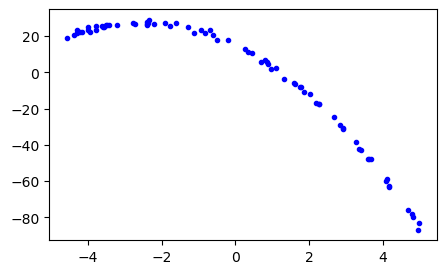

In [2]:
np.random.seed(314)

def f(x):
    return -2 * x**2 - 10 * x + 15

n = 75
X = 10 * np.random.rand(n, 1) - 5
y = f(X) + np.random.randn(n, 1)
plt.figure(figsize=(5, 3))
plt.scatter(X, y, c='blue', marker='.')
plt.plot()

Adding a square feature to the instance vector:

In [3]:
polyfeat = PolynomialFeatures(degree=2, include_bias=False)
X_poly = polyfeat.fit_transform(X) #X_poly = [X, X**2]

## (1) Polynomial Regression

In [4]:
linreg = LinearRegression()
linreg.fit(X_poly, y)
linreg.intercept_, linreg.coef_

(array([15.08220859]), array([[-10.03771023,  -2.00089741]]))

Plotting the resulting interpolation:

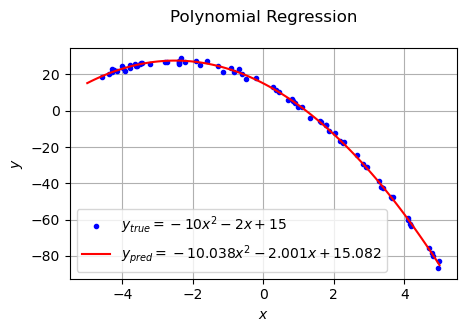

In [5]:
X_new = np.linspace(-5, 5, 100).reshape(100, 1)
X_new_poly = polyfeat.transform(X_new)
y_new = linreg.predict(X_new_poly)

theta2, theta1 = np.round(linreg.coef_[0], 3)
theta0 = np.round(linreg.intercept_[0], 3)

plt.figure(figsize=(5, 3))
plt.plot(X, y, "b.", label="$y_{true} = -10 x^2 - 2 x + 15$")
plt.plot(X_new, y_new, "r-", label='$y_{} = {} x^2 {} x + {}$'.format("{pred}", theta2, theta1, theta0))
plt.title("Polynomial Regression\n")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.grid()
plt.show()

Computing the Root Mean Squared Error:

In [6]:
y_pred = linreg.predict(X_new_poly)
y_true = f(X_new)
np.sqrt(mean_squared_error(y_true, y_pred))

0.1330357547687612

## (2) Support Vector Machine Regression

In [7]:
svrreg = Pipeline([
            ('scl', StandardScaler()),
            ('svr', LinearSVR(epsilon=0.1, dual='auto', random_state=314))
            ])
svrreg.fit(X_poly, y.ravel())

#Coefficients are not directly accessible, so we have to compute them ourselves.
X0 = [[0, 0], [-1, 1], [1, 1]]
print(svrreg.predict(X0))

[14.90977674 22.77071536  3.12609956]


In [8]:
#Solving the resulting linear system of equations yields approximately
theta1, theta2, theta0 = -1.961, -9.822, 14.910

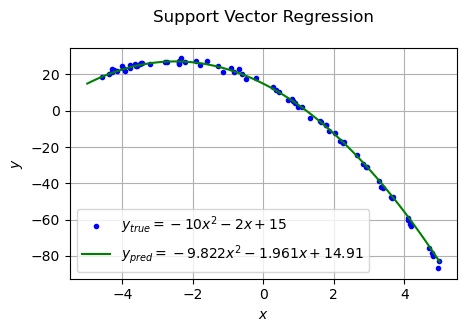

In [9]:
X_new = np.linspace(-5, 5, 100).reshape(100, 1)
X_new_poly = polyfeat.transform(X_new)
y_new = svrreg.predict(X_new_poly)

plt.figure(figsize=(5, 3))
plt.plot(X, y, "b.", label="$y_{true} = -10 x^2 - 2 x + 15$")
plt.plot(X_new, y_new, "g-", label='$y_{} = {} x^2 {} x + {}$'.format("{pred}", theta2, theta1, theta0))
plt.title("Support Vector Regression\n")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.grid()
plt.show()

Computing the Root Mean Squared Error:

In [10]:
y_pred = svrreg.predict(X_new_poly)
y_true = f(X_new)
np.sqrt(mean_squared_error(y_true, y_pred))

0.6414374141492896

## (3) Decision Tree Regression

In [39]:
treereg = DecisionTreeRegressor(max_depth=3, random_state=314)
treereg.fit(X_poly, y)
#The resulting function is not a quadratic polynomial, but a piecewise constant function.

DecisionTreeRegressor(max_depth=3, random_state=314)

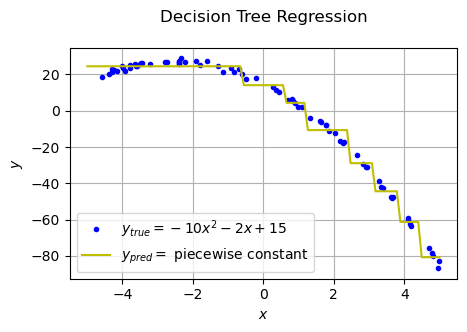

In [43]:
X_new = np.linspace(-5, 5, 100).reshape(100, 1)
X_new_poly = polyfeat.transform(X_new)
y_new = treereg.predict(X_new_poly)

plt.figure(figsize=(5, 3))
plt.plot(X, y, "b.", label="$y_{true} = -10 x^2 - 2 x + 15$")
plt.plot(X_new, y_new, "y-", label='$y_{pred} =$ piecewise constant')
plt.title("Decision Tree Regression\n")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.grid()
plt.show()

In [37]:
y_pred = treereg.predict(X_new_poly)
y_true = f(X_new)
np.sqrt(mean_squared_error(y_true, y_pred))

4.214934506216763